## Simulation setup

### Simulation parameters


Libraries are imported and program folders and files are defined:

In [20]:
import math                    
import numpy as np             
import matplotlib.pyplot as plt 
import os
import glob

folder_case="case"
folder_out="output-files"

fname_config="configure.input"
fname_ini="initial.out"

#files = glob.glob(folder_out)
#for f in files:
#    os.remove(f)

#hay que hacer un delete de los datos

Simulation configuration:

In [21]:
#Simulation setup
FinalTime = 0.4
DumpTime = 0.9
CFL = 0.3
Order = 7

#Mesh setup
xcells = 20
ycells = 20
zcells = 20
SizeX = .6
SizeY = .6
SizeZ = .6

#Boundary conditions
Face_1 = 1 #-y
Face_2 = 1 #+x
Face_3 = 1 #+y
Face_4 = 1 #-x
Face_5 = 1 #-z
Face_6 = 1 #+z

#Linear transport, only if applicable
u_x = 1.0
u_y = 1.0
u_z = 1.0



### Initial conditions

In [22]:
dx=SizeX/xcells
dy=SizeY/ycells
dz=SizeZ/zcells

xc=np.zeros((xcells,ycells,zcells))
yc=np.zeros((xcells,ycells,zcells))
zc=np.zeros((xcells,ycells,zcells))

u=np.zeros((xcells,ycells,zcells))
v=np.zeros((xcells,ycells,zcells))
w=np.zeros((xcells,ycells,zcells))
rho=np.zeros((xcells,ycells,zcells))
p=np.zeros((xcells,ycells,zcells))  
phi=np.zeros((xcells,ycells,zcells))  
    
x=np.arange(0+dx/2.0, SizeX, dx)
y=np.arange(0+dy/2.0, SizeY, dy)
z=np.arange(0+dz/2.0, SizeZ, dz)

xc, yc, zc= np.meshgrid(x,y,z,indexing='ij')


In [23]:
case=1

if case==1:
    FinalTime = 2.5
    for l in range(0,xcells): 
        for m in range(0,ycells):
            for n in range(0,zcells):
                #r=np.sqrt(xc[l,m,n]**2+yc[l,m,n]**2+zc[l,m,n]**2)
                if (xc[l,m,n]>0.15 and xc[l,m,n]<0.45) and (yc[l,m,n]>0.15 and yc[l,m,n]<0.45) and (zc[l,m,n]>0.15 and zc[l,m,n]<0.45):
                    rho[l,m,n]=0.125
                    p  [l,m,n]=0.14
                    phi[l,m,n]=1.0
                else:
                    rho[l,m,n]=1.0
                    p  [l,m,n]=1.0
                    phi[l,m,n]=0.0 

  

## Writing files

In [24]:
f = open(folder_case+"/"+fname_config, "w")
f.write("/////SIMULATION_SETUP////// \n")
f.write("FinalTime    "+str(FinalTime)+"\n")
f.write("DumpTime    "+str(DumpTime)+"\n")
f.write("CFL    "+str(CFL)+"\n")
f.write("Order    "+str(Order)+"\n")
f.write(" \n")
f.write("////////MESH_SETUP/////////\n")
f.write("xcells    "+str(xcells)+"\n")
f.write("ycells    "+str(ycells)+"\n")
f.write("zcells    "+str(zcells)+"\n")
f.write("SizeX    "+str(SizeX)+"\n")
f.write("SizeY    "+str(SizeY)+"\n")
f.write("SizeZ    "+str(SizeZ)+"\n")
f.write(" \n")
f.write("///////BOUNDARY_COND///////\n")
f.write("Face_1    "+str(Face_1)+"\n")
f.write("Face_2    "+str(Face_2)+"\n")
f.write("Face_3    "+str(Face_3)+"\n")
f.write("Face_4    "+str(Face_4)+"\n")
f.write("Face_5    "+str(Face_5)+"\n")
f.write("Face_6    "+str(Face_6)+"\n")
f.write(" \n")
f.write("///////LINEAR_TRANSPORT///////(if_applicable)\n")
f.write("u_x    "+str(u_x)+"\n")
f.write("u_y    "+str(u_y)+"\n")
f.write("u_z    "+str(u_z)+"\n")
f.close()


f = open(folder_case+"/"+fname_ini, "w")
f.write("VARIABLES = X, Y, Z, u, v, w, rho, p, phi \n")
f.write("CELLS = "+str(xcells)+", "+str(ycells)+", "+str(zcells)+","+"\n")
for l in range(0,xcells):   
    for m in range(0,ycells):
        for n in range(0,zcells):
            f.write(str(xc[l,m,n])+" "+str(yc[l,m,n])+" "+str(zc[l,m,n])+" "+str(u[l,m,n])+" "+str(v[l,m,n])+" "+str(w[l,m,n])+" "+str(rho[l,m,n])+" "+str(p[l,m,n])+" "+str(phi[l,m,n])+"\n")

f.close()         


## Running the code

In [25]:
import subprocess

binary="euler.exe"      

def system_call(command):
    p = subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
    while True:
        line = p.stdout.readline()
        if not line:
            break
        print(line.rstrip())
    return 1

system_call(binary)

b''
b'\x1bAuthors:'
b' - Adri\xc3\xa1n Navas Montilla'
b' - Isabel Echeverribar'
b'Copyright (C) 2018-2019 The authors.'
b''
b'License type: Creative Commons Attribution-NonCommercial-NoDerivs 3.0 Spain (CC BY-NC-ND 3.0 ES under the following terms:'
b''
b' - Attribution \xe2\x80\x94 You must give appropriate credit and provide a link to the license.'
b' - NonCommercial \xe2\x80\x94 You may not use the material for commercial purposes.'
b' - NoDerivatives \xe2\x80\x94 If you remix, transform, or build upon the material, you may not distribute the modified material unless explicit permission of the authors is provided.'
b''
b'Disclaimer: This software is distributed for research and/or academic purposes, WITHOUT ANY WARRANTY. In no event shall the authors be liable for any claim, damages or other liability, arising from, out of or in connection with the software or the use or other dealings in this software.\x1b'
b''
b' \x1bSIMULATION SETUP:\x1b'
b' WENO reconstruction of order 7 is cho

1

## Reading and plotting data:

Reading data:

In [26]:
from glob import glob

files = glob(folder_out+"/list*")
lf=len(files)

x=np.zeros((xcells,ycells,zcells))
y=np.zeros((xcells,ycells,zcells))
z=np.zeros((xcells,ycells,zcells))

u=np.zeros((xcells,ycells,zcells,lf))
v=np.zeros((xcells,ycells,zcells,lf))
w=np.zeros((xcells,ycells,zcells,lf))
rho=np.zeros((xcells,ycells,zcells,lf))
p=np.zeros((xcells,ycells,zcells,lf))
phi=np.zeros((xcells,ycells,zcells,lf))
E=np.zeros((xcells,ycells,zcells,lf))

gamma=1.4

j=0
for fname in files:
    print(fname+" file read")
    data     = np.loadtxt(fname, skiprows=2)
    k=0
    for l in range(0,xcells):   
        for m in range(0,ycells):
            for n in range(0,zcells):
                #k = l + m*xcells + n*xcells*ycells
                xc[l,m,n]=data[k,0]
                yc[l,m,n]=data[k,1]
                zc[l,m,n]=data[k,2]
                u[l,m,n,j]=data[k,3]
                v[l,m,n,j]=data[k,4]
                w[l,m,n,j]=data[k,5]
                rho[l,m,n,j]=data[k,6]
                p[l,m,n,j]=data[k,7]
                phi[l,m,n,j]=data[k,8]
                E[l,m,n,j]=p[l,m,n,j]/(gamma-1.0)+0.5*rho[l,m,n,j]*(u[l,m,n,j]*u[l,m,n,j] + v[l,m,n,j]*v[l,m,n,j] + w[l,m,n,j]*w[l,m,n,j]);
                k+=1       
    j=j+1

output-files\list000.out file read
output-files\list001.out file read
output-files\list002.out file read
output-files\list003.out file read


**1D PLOT:**

1.06414123373861


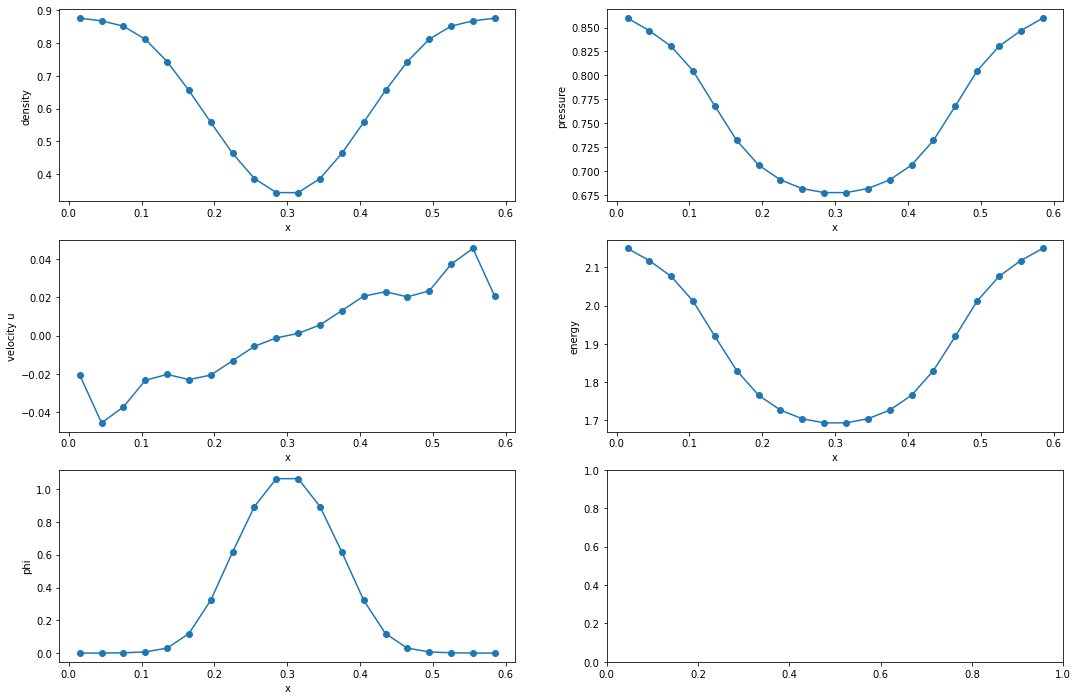

In [27]:
j=3

m=int(ycells/2) #y-index
n=int(zcells/2)  #z-index


fig, ax  = plt.subplots(3,2,figsize=(18, 12))

ax[0,0].plot(xc[:,m,n],rho[:,m,n,j],'o-')
if 'exactS' in globals():
    ax[0,0].plot(exactS[:,0],exactS[:,1],'k-') 
ax[0,0].set_xlabel("x") 
ax[0,0].set_ylabel("density") 

ax[0,1].plot(xc[:,m,n],p[:,m,n,j],'o-')
if 'exactS' in globals():
    ax[0,1].plot(exactS[:,0],exactS[:,2],'k-') 
ax[0,1].set_xlabel("x") 
ax[0,1].set_ylabel("pressure") 

ax[1,0].plot(xc[:,m,n],u[:,m,n,j],'o-') 
if 'exactS' in globals():
    ax[1,0].plot(exactS[:,0],exactS[:,3],'k-') 
ax[1,0].set_xlabel("x") 
ax[1,0].set_ylabel("velocity u") 

ax[1,1].plot(xc[:,m,n],E[:,m,n,j],'o-') 
ax[1,1].set_xlabel("x") 
ax[1,1].set_ylabel("energy") 

ax[2,0].plot(xc[:,m,n],phi[:,m,n,j],'o-') 
ax[2,0].set_xlabel("x") 
ax[2,0].set_ylabel("phi") 

print(np.max(phi))


**2D PLOT:**

1.06414123373476


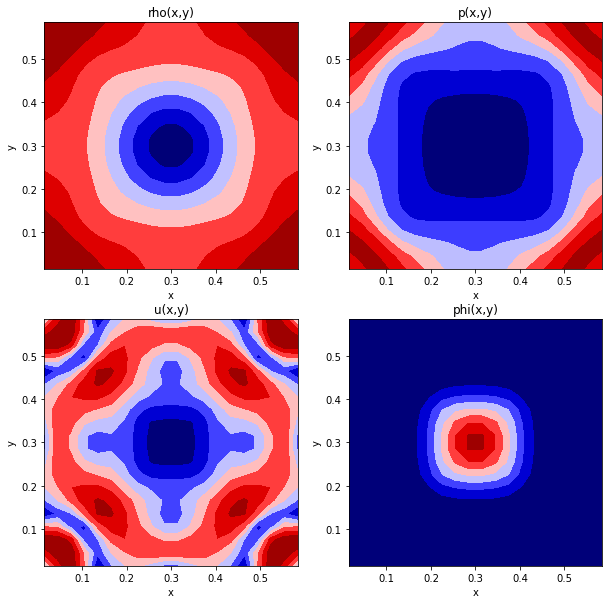

In [28]:
j=3

n=int(zcells/2) #z-index

xp = xc[:,0,n]     #puntos en x
yp = yc[0,:,n]      #puntos en y
X, Y = np.meshgrid(xp, yp)    #matriz de puntos
Srho=np.transpose(rho[:,:,n,j])
Spres=np.transpose(p[:,:,n,j])
Svel=np.transpose(np.sqrt(u[:,:,n,j]**2+v[:,:,n,j]**2))
Senr=np.transpose(E[:,:,n,j])
Sphi=np.transpose(phi[:,:,n,j])
  
fig, ax = plt.subplots(2,2,figsize=(10, 10))      #genera el objeto "figura"

ax[0,0].contourf(X, Y, Srho, cmap='seismic')     
ax[0,0].set_title('rho(x,y)')
ax[0,0].set_xlabel("x") 
ax[0,0].set_ylabel("y") 

ax[0,1].contourf(X, Y, Spres, cmap='seismic' )     
ax[0,1].set_title('p(x,y)')
ax[0,1].set_xlabel("x") 
ax[0,1].set_ylabel("y") 

ax[1,0].contourf(X, Y, Svel, cmap='seismic')     
ax[1,0].set_title('u(x,y)')
ax[1,0].set_xlabel("x") 
ax[1,0].set_ylabel("y") 

ax[1,1].contourf(X, Y, Sphi, cmap='seismic')     
ax[1,1].set_title('phi(x,y)')
ax[1,1].set_xlabel("x") 
ax[1,1].set_ylabel("y") 

print(np.max(Sphi))

**3D PLOT:**

In [29]:
import plotly.graph_objects as go   #requires to install using anaconda prompt (as admin): conda install -c plotly plotly=5.2.1

j=3
modU=np.sqrt(u[:,:,:,j]**2+v[:,:,:,j]**2+w[:,:,:,j]**2)

fig = go.Figure(data=go.Volume(
    x=xc.flatten(),
    y=yc.flatten(),
    z=zc.flatten(),
    value=modU.flatten(),
    isomin=0.05,
    isomax=0.3,
    opacity=0.1, # needs to be small to see through all surfaces
    surface_count=14, # needs to be a large number for good volume rendering
    ))
fig.show()


fig.write_image("output-files/fig1.png")

In [30]:
#Author:
# - Adrián Navas Montilla
#
#Copyright (C) 2021 The author.  
#
#License type: Creative Commons Attribution-NonCommercial-NoDerivs 3.0 Spain (CC BY-NC-ND 3.0 ES https://creativecommons.org/licenses/by-nc-nd/3.0/es/deed.en) under the following terms: 
#
#- Attribution — You must give appropriate credit and provide a link to the license.
#- NonCommercial — You may not use the material for commercial purposes.
#- NoDerivatives — If you remix, transform, or build upon the material, you may not distribute the modified material unless explicit permission of the authors is provided. 
#
#Disclaimer: This software is distributed for research and/or academic purposes, WITHOUT ANY WARRANTY. In no event shall the authors be liable for any claim, damages or other liability, arising from, out of or in connection with the software or the use or other dealings in this software.
